# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Polarizacion-de-la-fuente-de-luz" data-toc-modified-id="Polarizacion-de-la-fuente-de-luz-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarizacion de la fuente de luz</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-polarizador-para-ver-fluctuaciones-de-la-fuente" data-toc-modified-id="Rotación-de-polarizador-para-ver-fluctuaciones-de-la-fuente-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rotación de polarizador para ver fluctuaciones de la fuente</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final</a></div>

# Polarizacion de la fuente de luz

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1
1. Polarizador de calibración

**Procedimiento**:
Necesitamos una referencia *absoluta* para conocer el estado de polarización del primer polarizador.
Todavía no sabemos los parámetros, que se calculan en el siguiente paso. 
Aquí se pretende calcular el ángulo donde pasa toda la luz a través de los dos polarizadores, polarizador 1 y de calibración


1. Se gira el polarizador una vuelta para buscar la posición de máxima intensidad. 


**Resultado**

El ángulo de P1 donde haya máxima intensidad es aquel alineado con el suelo.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
from __future__ import print_function

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import time
import datetime

import pprint
from scipy.io import savemat, loadmat


## Tarjeta de adquisición de datos

In [3]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [5]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

## Motores

In [7]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels = [600, 600, 600, 600]

In [8]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



## Rotación de polarizador para ver fluctuaciones de la fuente


In [17]:
num_data=90
angles=sp.linspace(0,360,num_data)
intensities_1=sp.zeros_like(angles,dtype=float)

In [18]:
for i, angle in enumerate(angles):
    motors.move(
        positions=[angle, 0, 0, 0], velocities=Vels, verbose=False)
    intensities_1[i]=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

1.2805, 1.2856, 1.2753, 1.2600, 1.2395, 1.2037, 1.1679, 1.1167, 1.0655, 1.0093, 0.9479, 0.8865, 0.8199, 0.7585, 0.6971, 0.6357, 0.5794, 0.5334, 0.4822, 0.4464, 0.4106, 0.3850, 0.3748, 0.3645, 0.3748, 0.3850, 0.4106, 0.4413, 0.4771, 0.5232, 0.5692, 0.6306, 0.6869, 0.7432, 0.8148, 0.8762, 0.9376, 0.9990, 1.0553, 1.1116, 1.1628, 1.2037, 1.2344, 1.2600, 1.2753, 1.2805, 1.2805, 1.2753, 1.2549, 1.2242, 1.1883, 1.1474, 1.0962, 1.0400, 0.9837, 0.9223, 0.8609, 0.7943, 0.7278, 0.6664, 0.6101, 0.5590, 0.5078, 0.4669, 0.4311, 0.4004, 0.3850, 0.3748, 0.3748, 0.3799, 0.3952, 0.4259, 0.4566, 0.5027, 0.5487, 0.5999, 0.6562, 0.7176, 0.7841, 0.8506, 0.9069, 0.9683, 1.0246, 1.0860, 1.1372, 1.1781, 1.2190, 1.2446, 1.2651, 1.2805, 

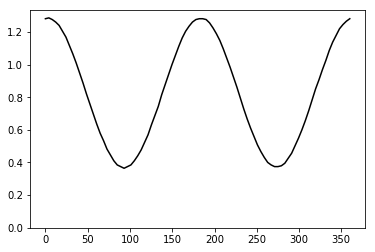

In [19]:
filename="step2_P1_angle_{}".format(datetime.date.today())

plt.figure()
plt.plot(angles,intensities_1,'k')
plt.ylim(ymin=0)
plt.savefig(filename+'.pdf')

In [21]:

np.save(filename+'.npy', np.array([angles, intensities_1]).transpose())
np.savetxt(filename+'.txt', np.array([angles, intensities_1]).transpose() )
savemat(filename+'.mat', {'angles': angles, 'intensities_1': intensities_1})

## Final

In [ ]:
motors.close()
del motors
LabJackPython.Close()